In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq
from matplotlib import pyplot as plt
from labellines import labelLines

In [3]:
fluxonium_031 = scq.Fluxonium.create()

Output()

In [18]:
def plot_transition_spectrum(phi_ext_list, eigval_list):
#     plt.figure(figsize=(8,5))
    fig, axes =plt.subplots(dpi = 150)
    N = np.shape(eigval_list)[0]
    # probable transition:
    # 0-f, 1-f
    spectrum_list_0 = np.zeros((N-1, len(phi_ext_list)))
    spectrum_list_1 = np.zeros((N-2, len(phi_ext_list)))
    
    for i in range(N-1):
        spectrum_list_0[i] = eigval_list[i+1] - eigval_list[0]
    for i in range(N-2):
        spectrum_list_1[i] = eigval_list[i+2] - eigval_list[1]
        
    plt.xlabel(r"$\frac{\phi_{ext}}{2\pi}$", fontsize=20)
    plt.ylabel("Frequency(GHz)", fontsize=16)
    plt.title("Transition spectrum", fontsize=16)
    
    #plt.plot(phi_ext_list, spectrum_list_0[0], "k")
    #plt.plot(phi_ext_list, spectrum_list_1[2], "k")
    for idx in range(np.shape(spectrum_list_0)[0]):
        plt.plot(phi_ext_list, spectrum_list_0[idx],label=f"{idx+1},0")
        if idx !=0:
            plt.plot(phi_ext_list, spectrum_list_0[idx]/2,"--",label=f"{idx+1},0 2p")
    for idx in range(np.shape(spectrum_list_1)[0]):
        plt.plot(phi_ext_list, spectrum_list_1[idx], alpha=0.7,label=f"{idx+2},1")
        plt.plot(phi_ext_list, spectrum_list_1[idx]/2,"-" ,alpha=0.7,label=f"{idx+2},1 2p")
    labelLines(axes.get_lines(), zorder=1.5)

In [72]:
fluxonium_031 = scq.Fluxonium(
    EJ=6.305,
    EC=0.77,
    EL=0.94,
    cutoff = 30,
    flux = 0.492
)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25c291081f0>)

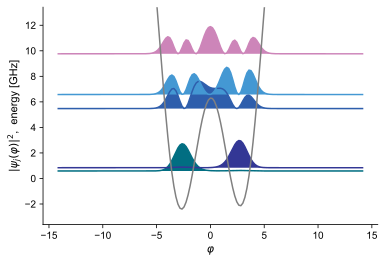

In [73]:
fluxonium_031.plot_wavefunction(which=[0,1,2,3,4], mode='abs_sqr', esys=None, phi_grid=None, scaling=None)

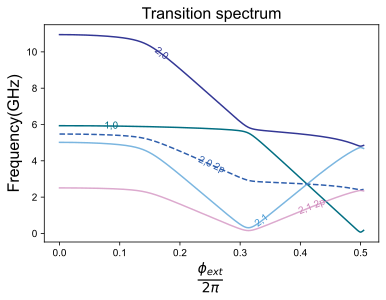

In [21]:
# %matplotlib notebook
import mpld3
mpld3.enable_notebook()

flux_list = np.linspace(0.0, 0.505, 501)
eigval = fluxonium_031.get_spectrum_vs_paramvals("flux", flux_list, evals_count=3).energy_table
eigval = eigval.T

plot_transition_spectrum(flux_list, eigval)
# plt.xlim([0.49,0.5])
#plt.ylim([4,7])
